In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss

In [92]:
db = pd.read_csv('dataset.csv')
X = db[['X1', 'X2']]
Y = db['Y']
db

,X1,X2,Y
0,2.781084,2.550537,0
1,1.465489,2.362125,0
2,3.396562,4.400294,0
3,1.388070,1.850220,0
4,3.064072,3.005306,0
5,7.627531,2.759262,1
6,5.332441,2.088627,1
7,6.922597,1.771064,1
8,8.675419,-0.242070,1
9,7.673756,3.508563,1


In [93]:
#1a
model = LogisticRegression()
model.fit(X,Y)
B0 = model.intercept_[0]
B1,B2 = model.coef_[0]
print(f"Coefficients are B0 = {B0}, B1 = {B1}, B2 = {B2}")

Coefficients are B0 = -4.551633521124653, B1 = 1.183834155636202, B2 = -0.35803502860018704


In [97]:
#1b
p = []
l = []
e = []
for i in range(len(X)):
    instance = X.iloc[i]
    pred = 1/(1+np.exp(-(B0 + B1*instance[0] + B2*instance[1])))
    loss = round(pred)-y[i]
    error = pred - y[i]
    e.append(error)
    p.append(round(pred))
    l.append(loss)
    print(f"For X={instance[0], instance[1]}, pred={round(pred)}, loss={loss}, predWithRound={pred}, error={error}")


For X=(2.781084, 2.550537), pred=0, loss=0, predWithRound=0.1022498125742718, error=0.1022498125742718
For X=(1.465489, 2.362125), pred=0, loss=0, predWithRound=0.02502684032438537, error=0.02502684032438537
For X=(3.396562, 4.400294), pred=0, loss=0, predWithRound=0.10850275313408725, error=0.10850275313408725
For X=(1.38807, 1.85022), pred=0, loss=0, predWithRound=0.027362648385509735, error=0.027362648385509735
For X=(3.064072, 3.005306), pred=0, loss=0, predWithRound=0.11917297565982612, error=0.11917297565982612
For X=(7.627531, 2.759262), pred=1, loss=0, predWithRound=0.970407230498633, error=-0.029592769501367022
For X=(5.332441, 2.088627), pred=1, loss=0, predWithRound=0.7336636387683158, error=-0.26633636123168425
For X=(6.922597, 1.771064), pred=1, loss=0, predWithRound=0.9530001344329782, error=-0.04699986556702185
For X=(8.675419, -0.24207), pred=1, loss=0, predWithRound=0.9969974711350023, error=-0.0030025288649977444
For X=(7.673756, 3.508563), pred=1, loss=0, predWithRou

In [98]:
#1c
correct = 0
for i in range(len(p)):
    if(p[i] == y[i]):
        correct += 1
        
accuracy = (correct/len(p))*100
print(accuracy)

100.0


In [100]:
#1d
for i in range(len(X)):
    a1,a2 = X.iloc[i]
    b = y[i]
    c = p[i]
    d = l[i]
    print(f"X1,X2 = {a1,a2}, Y = {b}, pred = {c}, loss = {d}")

X1,X2 = (2.781084, 2.550537), Y = 0, pred = 0, loss = 0
X1,X2 = (1.465489, 2.362125), Y = 0, pred = 0, loss = 0
X1,X2 = (3.396562, 4.400294), Y = 0, pred = 0, loss = 0
X1,X2 = (1.38807, 1.85022), Y = 0, pred = 0, loss = 0
X1,X2 = (3.064072, 3.005306), Y = 0, pred = 0, loss = 0
X1,X2 = (7.627531, 2.759262), Y = 1, pred = 1, loss = 0
X1,X2 = (5.332441, 2.088627), Y = 1, pred = 1, loss = 0
X1,X2 = (6.922597, 1.771064), Y = 1, pred = 1, loss = 0
X1,X2 = (8.675419, -0.24207), Y = 1, pred = 1, loss = 0
X1,X2 = (7.673756, 3.508563), Y = 1, pred = 1, loss = 0


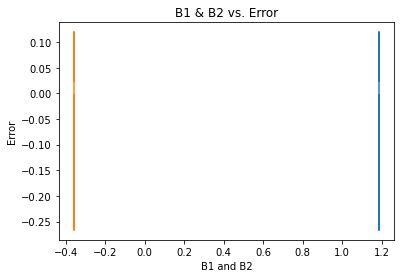

In [101]:
#1e

b1_val = np.array(B1)
b1_val = np.repeat(b1_val, 10)
b2_val = np.array(B2)
b2_val = np.repeat(b2_val, 10)
plt.plot(b1_val, e)
plt.plot(b2_val, e)
plt.xlabel('B1 and B2')
plt.ylabel('Error')
plt.title('B1 & B2 vs. Error')
plt.show()

# 2

In [41]:
db = pd.read_csv('dataset.csv')
X = db[['X1']]
y = db['Y']
db

,X1,X2,Y
0,2.781084,2.550537,0
1,1.465489,2.362125,0
2,3.396562,4.400294,0
3,1.388070,1.850220,0
4,3.064072,3.005306,0
5,7.627531,2.759262,1
6,5.332441,2.088627,1
7,6.922597,1.771064,1
8,8.675419,-0.242070,1
9,7.673756,3.508563,1


In [80]:
#2a
model2 = LogisticRegression()
model2.fit(X,y)
b0 = model2.intercept_[0]
b1 = model2.coef_[0]
print(f"Coefficients are B0 = {b0}, B1 = {b1}")

Coefficients are B0 = -4.551633521124653, B1 = [ 1.18383416 -0.35803503]


In [86]:
#2b
p = []
l = []
e = []
for i in range(len(X)):
    instance = X.iloc[i]
    print(instance[0])
    pred = 1/(1+np.exp(-(b0 + b1*instance[0])))
    loss = round(pred[0])-y[i]
    error = pred[0] - y[i]
    e.append(error)
    p.append(round(pred[0]))
    l.append(loss)
    print(f"For X1={instance[0]}, pred={round(pred[0])}, loss={loss}, predWithRound={pred[0]}, error={error}")

2.781084
For X1=2.781084, pred=0, loss=0, predWithRound=0.22109591644083587, error=0.22109591644083587
1.465489
For X1=1.465489, pred=0, loss=0, predWithRound=0.05642638119887166, error=0.05642638119887166
3.396562
For X1=3.396562, pred=0, loss=0, predWithRound=0.37036123781934, error=0.37036123781934
1.38807
For X1=1.38807, pred=0, loss=0, predWithRound=0.051740427084389154, error=0.051740427084389154
3.064072
For X1=3.064072, pred=0, loss=0, predWithRound=0.28408653013274704, error=0.28408653013274704
7.627531
For X1=7.627531, pred=1, loss=0, predWithRound=0.9887725005661854, error=-0.011227499433814625
5.332441
For X1=5.332441, pred=1, loss=0, predWithRound=0.85334640622831, error=-0.14665359377168996
6.922597
For X1=6.922597, pred=1, loss=0, predWithRound=0.9745081292380281, error=-0.025491870761971902
8.675419
For X1=8.675419, pred=1, loss=0, predWithRound=0.9967265233127391, error=-0.0032734766872608567
7.673756
For X1=7.673756, pred=1, loss=0, predWithRound=0.9893640325643677, e

In [65]:
#2c
correct = 0
for i in range(len(p)):
    if(p[i] == y[i]):
        correct += 1
        
accuracy = (correct/len(p))*100
print(accuracy)

100.0


In [68]:
#2d
for i in range(len(X)):
    a = X.iloc[i]
    b = y[i]
    c = p[i]
    d = l[i]
    print(f"X1 = {a[0]}, Y = {b}, pred = {c}, loss = {d}")

X1 = 2.781084, Y = 0, pred = 0, loss = 0
X1 = 1.465489, Y = 0, pred = 0, loss = 0
X1 = 3.396562, Y = 0, pred = 0, loss = 0
X1 = 1.38807, Y = 0, pred = 0, loss = 0
X1 = 3.064072, Y = 0, pred = 0, loss = 0
X1 = 7.627531, Y = 1, pred = 1, loss = 0
X1 = 5.332441, Y = 1, pred = 1, loss = 0
X1 = 6.922597, Y = 1, pred = 1, loss = 0
X1 = 8.675419, Y = 1, pred = 1, loss = 0
X1 = 7.673756, Y = 1, pred = 1, loss = 0


In [84]:
print("Error for each instance:")
print(e)

Error for each instance:
[0.09011843087420256, 0.019369574767893347, 0.17394784416907869, 0.01764723237807845, 0.12288607383137673, -0.025899746509124966, -0.3069159761699416, -0.05933640140326113, -0.007307641521217323, -0.024508266556381386]


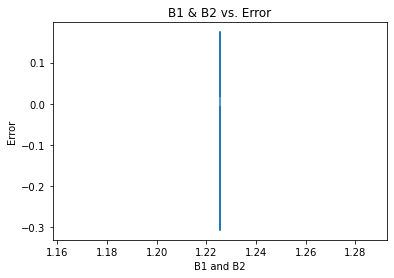

In [77]:
#2e
b1_val = np.array(b1)
b1_val = np.repeat(b1_val, 10)
plt.plot(b1_val, e)
plt.xlabel('B1 and B2')
plt.ylabel('Error')
plt.title('B1 & B2 vs. Error')
plt.show()

In [83]:
#2g
y_pred = model2.predict(X)
y_prob = model2.predict_proba(X)[:,1]
error = log_loss(y,y_prob)
print(f"Log Error = {error}")

accuracy = accuracy_score(y, y_pred)
print(f'Accuracy = {accuracy * 100: .2f}%')

Log Error = 0.08306509611955018
Accuracy =  100.00%


Coefficients (B0, B1, B2) after SGD = (0.025086971764223174, 1.3684274845285613, -0.41982002261272605)
Error (Log Loss) = 0.2430264114809134
Accuracy after SGD = 100.00%


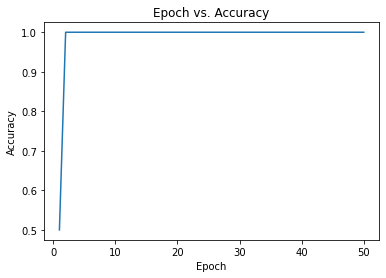

Accuracy using scikit-learn = 100.00%


In [73]:
#3



import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss
from sklearn.preprocessing import StandardScaler


data = pd.read_csv("dataset.csv")
X = data[['X1', 'X2']]
y = data['Y']


#3a
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
np.random.seed(0)
B0 = 0
B1 = 0
B2 = 0
learning_rate = 0.01
n_iterations = 50
n_samples = len(X_scaled)
epoch_accuracy = []

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

for iteration in range(n_iterations):
    epoch_accuracy.append(accuracy_score(y, (sigmoid(B0 + B1 * X_scaled[:, 0] + B2 * X_scaled[:, 1]) >= 0.5).astype(int)))
    for i in range(n_samples):
        prediction = sigmoid(B0 + B1 * X_scaled[i, 0] + B2 * X_scaled[i, 1])
        error = y[i] - prediction
        B0 += learning_rate * error
        B1 += learning_rate * error * X_scaled[i, 0]
        B2 += learning_rate * error * X_scaled[i, 1]

print(f"Coefficients (B0, B1, B2) after SGD = ({B0}, {B1}, {B2})")


#3b
y_pred_prob = sigmoid(B0 + B1 * X_scaled[:, 0] + B2 * X_scaled[:, 1])
error = log_loss(y, y_pred_prob)
print(f"Error (Log Loss) = {error}")


#3c
accuracy = accuracy_score(y, (y_pred_prob >= 0.5).astype(int))
print(f"Accuracy after SGD = {accuracy * 100:.2f}%")


#3d
plt.plot(range(1, n_iterations + 1), epoch_accuracy)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Epoch vs. Accuracy')
plt.show()


#3f
lr = LogisticRegression(solver='lbfgs')
lr.fit(X_scaled, y)
sklearn_accuracy = accuracy_score(y, lr.predict(X_scaled))
print(f"Accuracy using scikit-learn = {sklearn_accuracy * 100:.2f}%")
